# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [ ]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --no-deps --force-reinstall ./$ait_sdk_name

### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
    requirements_generator.add_package('pandas', '2.2.3')
    requirements_generator.add_package('numpy','1.26.4')
    requirements_generator.add_package('torch','2.5.1')
    requirements_generator.add_package('h5py','3.12.1')
    requirements_generator.add_package('matplotlib','3.9.3')
    requirements_generator.add_package('opencv-python-headless','4.10.0.84')
    requirements_generator.add_package('scipy','1.13.1')


#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell
import csv
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import h5py
import torch
from torch.utils.data import Dataset
import numpy as np
import cv2
from scipy.stats import gaussian_kde
from scipy.integrate import simpson

#### #4-2 [uneditable]

In [7]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [8]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('alyz_dataset_topcoverage_auc')
    manifest_genenerator.set_ait_description('データセットにおけるデータの分布のデータ密度が高い領域から考えて、上位p%の領域の面積をSとする。pの値を0から1に変化させたときの面積Sの変化を確認することでデータの均一性を判断する。テーブルデータセットの場合は、指定された列の分布を使用し、指定された列で組分けを行い均一性を測定する。画像データセットの場合は物体の面積比率、平均明度、および物体の中心座標の原点からの距離の分布を使用する。')
    manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/Qunomon_AIT_alyz_dataset_topcoverage_auc')
    manifest_genenerator.set_ait_version('1.1')
    manifest_genenerator.add_ait_licenses('Apache License Version 2.0')
    manifest_genenerator.add_ait_keywords('AUC')
    manifest_genenerator.add_ait_keywords('TopCoverage')
    manifest_genenerator.add_ait_keywords('image')
    manifest_genenerator.set_ait_quality('https://ait-hub.pj.aist.go.jp/ait-hub/api/0.0.1/qualityDimensions/機械学習品質マネジメントガイドライン第三版/B-2データセットの均一性')
    #### Inventories
    inventory_requirement_dataset = manifest_genenerator.format_ait_inventory_requirement(format_=['h5','csv'])
    manifest_genenerator.add_ait_inventories(name='train_dataset', 
                                             type_='dataset', 
                                             description='学習用のcsvファイル形式テーブルデータセットもしくはHDF5形式画像データセット。テーブルデータは1行目に列名、2行目以降に値を記す。画像データセットの内部は2つのHDF5ファイルを用意する(ファイル名は任意)(1)モデルに入力される[-1,1]に正規化されている多次元配列を含むデータセット(データセット(1)の要素数はmodelの入力層の要素数と一致)(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット(データセット(2)の要素数はmodelの出力層の要素数と一致))', 
                                             requirement= inventory_requirement_dataset)
    manifest_genenerator.add_ait_inventories(name='test_dataset', 
                                             type_='dataset', 
                                             description='テスト用のcsvファイル形式テーブルデータセットもしくはHDF5形式画像データセット。テーブルデータは1行目に列名、2行目以降に値を記す。画像データセットの内部は2つのHDF5ファイルを用意する(ファイル名は任意)(1)モデルに入力される[-1,1]に正規化されている多次元配列を含むデータセット(データセット(1)の要素数はmodelの入力層の要素数と一致)(2)データの各サンプルの正解ラベル（クラスのインデックス値）を含むデータセット(データセット(2)の要素数はmodelの出力層の要素数と一致))', 
                                             requirement= inventory_requirement_dataset)
    #### Parameters
    manifest_genenerator.add_ait_parameters(name='train_input_dataset_name', 
                                            type_='str', 
                                            description='train_dataset inventoryで説明されている画像データセット(1)の名前', 
                                            default_val='x_train')
    manifest_genenerator.add_ait_parameters(name='train_label_dataset_name', 
                                            type_='str', 
                                            description='train_dataset inventoryで説明されている画像データセット(2)の名前', 
                                            default_val='y_train')
    manifest_genenerator.add_ait_parameters(name='test_input_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されている画像データセット(1)の名前', 
                                            default_val='x_test')
    manifest_genenerator.add_ait_parameters(name='test_label_dataset_name', 
                                            type_='str', 
                                            description='test_dataset inventoryで説明されている画像データセット(2)の名前', 
                                            default_val='y_test')
    manifest_genenerator.add_ait_parameters(name='kde_bandwidth',
                                            type_='float',
                                            default_val='0.5',
                                            min_value='0.1',
                                            max_value='1',
                                            description='データの分布を計算するときのカーネル密度推定に指定するバンド幅')
    manifest_genenerator.add_ait_parameters(name='dataset_channel',
                                            type_='int',
                                            description='train_dataset inventoryで説明されているデータセットとtest_dataset inventoryで説明されているデータセットのチャネル数(グレースケール画像の場合1、RGB画像の場合3)')
    manifest_genenerator.add_ait_parameters(name='target_columns',
                                            type_='str',
                                            default_val=' ',
                                            description='テーブルデータセットの評価を行う場合、均一性を測る列名を入力する。入力例：カラムA, カラムB')
    manifest_genenerator.add_ait_parameters(name='group_column',
                                            type_='str',
                                            default_val=' ',
                                            description='テーブルデータセットの評価を行う場合、入力された列名で組分けを行い均一性を測定する。入力された列名が量的変数の場合、指定した数だけ分割をする。入力された列名がカテゴリカル変数の場合、ユニーク値ごとに均一性を測定する。入力例：カラムC')
    manifest_genenerator.add_ait_parameters(name='num_group',
                                            type_='int',
                                            default_val='5',
                                            description='テーブルデータセットの評価を行う場合、入力された数だけ組分けを行う。',
                                           depends_on_parameter='group_column')

    #### Measures
    manifest_genenerator.add_ait_measures(name='train_Area_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用画像データセットの各クラスごとの面積比率のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='train_Brightness_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用画像データセットの各クラスごとの平均明度のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='train_Center_Coordinates_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用画像データセットの各クラスごとの中心座標の原点からの距離のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_Area_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用画像データセットの各クラスごとの面積比率のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_Brightness_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用画像データセットの各クラスごとの平均明度のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_Center_Coordinates_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用画像データセットの各クラスごとの中心座標の原点からの距離のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='train_csv_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='学習用テーブルデータセットの指定された列名のTopcoverageのAUC.値が1に近いほどデータが均一である')
    manifest_genenerator.add_ait_measures(name='test_csv_Topcoverage_AUC',
                                          type_='float',
                                          structure='sequence',
                                          description='テスト用テーブルデータセットの指定された列名のTopcoverageのAUC.値が1に近いほどデータが均一である')

    #### Resources
    manifest_genenerator.add_ait_resources(name='train_image_Top_p_coverage_Plot',
                                          type_='picture', 
                                          description='学習用画像データセットの密度プロット（物体の面積比率、平均明度、物体の中心座標の原点からの距離）の曲線のプロット')
    manifest_genenerator.add_ait_resources(name='test_image_Top_p_coverage_Plot',
                                          type_='picture', 
                                          description='テスト用画像データセットの密度プロット（物体の面積比率、平均明度、物体の中心座標の原点からの距離）の曲線のプロット')
    manifest_genenerator.add_ait_resources(name='train_csv_Top_p_coverage_Plot',
                                          type_='picture', 
                                          description='学習用テーブルデータセットの指定された列名から算出した密度プロットから計算するTPCoverageの変化曲線のプロット')
    manifest_genenerator.add_ait_resources(name='test_csv_Top_p_coverage_Plot',
                                          type_='picture', 
                                          description='テスト用テーブルデータセットの指定された列名から算出した密度プロットから計算するTPCoverageの変化曲線のプロット')
    manifest_genenerator.add_ait_resources(name='train_distribution_table', 
                                          type_='table', 
                                          description='学習用画像データセットの面積比率、平均明度、物体の中心座標の原点からの距離の分布表')
    manifest_genenerator.add_ait_resources(name='test_distribution_table', 
                                          type_='table', 
                                          description='テスト用画像データセットの面積比率、平均明度、物体の中心座標の原点からの距離の分布表')
    manifest_genenerator.add_ait_resources(name='train_csv_Top_p_coverage_table', 
                                          type_='table', 
                                          description='学習用テーブルデータセットの指定された列名から算出した密度プロットから計算するTPCoverageの変化曲線のAUCの表')
    manifest_genenerator.add_ait_resources(name='test_csv_Top_p_coverage_table', 
                                          type_='table', 
                                          description='テスト用テーブルデータセットの指定された列名から算出した密度プロットから計算するTPCoverageの変化曲線のAUCの表')

    #### Downloads
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [9]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    #input_generator.add_ait_inventories(name='train_dataset',
    #                                    value='mnist_data/aug_train.h5')
    #input_generator.add_ait_inventories(name='test_dataset',
    #                                    value='mnist_data/aug_test.h5')
    #input_generator.set_ait_params("train_input_dataset_name", "train_image")
    #input_generator.set_ait_params("train_label_dataset_name", "train_label")
    #input_generator.set_ait_params("test_input_dataset_name", "test_image")
    #input_generator.set_ait_params("test_label_dataset_name", "test_label")
    input_generator.add_ait_inventories(name='train_dataset',
                                        value='house_price/train_categorical_housing.csv')
    input_generator.add_ait_inventories(name='test_dataset',
                                        value='house_price/test_categorical_housing.csv')
    input_generator.set_ait_params("target_columns", "total_bedrooms,population,households,median_income")
    input_generator.set_ait_params("group_column", "housing_median_age")
    input_generator.set_ait_params("num_group", "4")
    input_generator.write()

### #7 Initialization

[uneditable]

In [10]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [11]:
#@log(logger)
# h5ファイルからデータを取得するクラス
class h5_dataset(Dataset):
    def __init__(self, h5_file_path, x_name, y_name, channels=1):
        self.h5_file = h5py.File(h5_file_path, 'r')
        self.images = self.h5_file[x_name]
        self.labels = self.h5_file[y_name]
        self.channels = channels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        image = torch.tensor(self.images[idx], dtype=torch.float32)
        label = torch.tensor(self.labels[idx],dtype=torch.long)
        if self.channels == 3 and image.shape[0] == 1:
            image = image.repeat(3, 1, 1)

        return image, label  
    
    def close(self):
        self.h5_file.close()

In [12]:
# 画像テンソルを受け取り、特徴量を算出するクラス
class ContourAnalyzer:
    def __init__(self, image_tensor):
        # 画像テンソルを受け取り、前処理を行う
        self.image_tensor = image_tensor
        self.image_np = self.preprocess_image(image_tensor)
        self.contours = []
        self.hierarchy = None

    def preprocess_image(self, image_tensor):
        # テンソルをNumPy配列に変換
        image_np = image_tensor.squeeze().cpu().numpy()  # 次元を削減して、(28, 28) に
        
        # 画像を0-255の範囲にスケーリングしてuint8型に変換
        image_scaled = (image_np - image_np.min()) / (image_np.max() - image_np.min()) * 255
        return image_scaled.astype(np.uint8)
    
    def find_contours(self):
        # 画像をカラーに変換し、グレースケール画像に戻す
        img_disp = cv2.cvtColor(self.image_np, cv2.COLOR_GRAY2BGR)
        img_gray = cv2.cvtColor(img_disp, cv2.COLOR_BGR2GRAY)
        
        # OpenCVでの輪郭検出
        self.contours, self.hierarchy = cv2.findContours(
            img_gray,
            cv2.RETR_EXTERNAL,      # 一番外側の輪郭のみを取得
            cv2.CHAIN_APPROX_SIMPLE  # 輪郭座標の近似
        )

    def analyze_contours(self):
        contour_data = []
        image_height, image_width = self.image_np.shape
        total_area = image_height * image_width
        for i, contour in enumerate(self.contours):
            x, y, w, h = cv2.boundingRect(contour)
            center_x = ( x + w / 2 ) / image_width
            center_y = ( y + h / 2 ) / image_height
            area = w * h
            area_ratio = area / total_area
            o_x = image_width / 2
            o_y = image_height / 2
            distance = np.sqrt((center_x - o_x)**2 + (center_y - o_y)**2)
            
            # 矩形領域内のピクセル値を抽出
            brightness = self.image_np[y:y+h, x:x+w]
            brightness_sum = np.sum(brightness)
            brightness_ave = brightness_sum / (area * 255)

            # brightness_aveが配列でないことを確認し、必要ならスカラー値に変換
            if isinstance(brightness_ave, np.ndarray):
                brightness_ave = brightness_ave.item()  # numpy配列をスカラー値に変換

            # 結果をリストに保存
            contour_data.append({
                'center_x': center_x, 'center_y': center_y,
                'area_ratio': area_ratio,'brightness_ave': brightness_ave,
                'distance': distance
            })

        return contour_data

In [13]:
def analyze_and_display(image_tensor, image_name, contour_data_list, area_ratio_by_label, brightness_ave_by_label, distance_by_label, label):
    # ContourAnalyzerクラスを使って画像処理と輪郭分析を行う
    analyzer = ContourAnalyzer(image_tensor)
    analyzer.find_contours()
    contour_data = analyzer.analyze_contours()

    # contour_dataをリストに追加
    for data in contour_data:
        contour_data_list.append({
            'image_name': image_name,  # 画像の名前（識別用）
            'label': label,  # ラベル
            'center_x': data['center_x'],
            'center_y': data['center_y'],
            'center_distance': data['distance'],
            'area_ratio': data['area_ratio'],
            'brightness_ave': data['brightness_ave']
        })
    # area_ratio をラベルごとに追加
    for data in contour_data:
        if label not in area_ratio_by_label:
            area_ratio_by_label[label] = []
        area_ratio_by_label[label].append(data['area_ratio'])
    # brightness_ave をラベルごとに追加
    for data in contour_data:
        if label not in brightness_ave_by_label:
            brightness_ave_by_label[label] = []
        brightness_ave_by_label[label].append(data['brightness_ave'])
    # distance をラベルごとに追加
    for data in contour_data:
        if label not in distance_by_label:
            distance_by_label[label] = []
        distance_by_label[label].append(data['distance'])      

@resources(ait_output, path_helper, 'train_distribution_table','train_distribution_table.csv')
def save_contour_data_to_csv_train(contour_data_list, dataset_type="train", file_path: str=None):
    # pandasのDataFrameに変換
    df = pd.DataFrame(contour_data_list)    
    
    df.to_csv(file_path, index=False)
    print(f"Data saved to train_distribution_table")
    return df
    
@resources(ait_output, path_helper, 'test_distribution_table','test_distribution_table.csv')
def save_contour_data_to_csv_test(contour_data_list, dataset_type="train", file_path: str=None):
    # pandasのDataFrameに変換
    df = pd.DataFrame(contour_data_list)
        
    df.to_csv(file_path, index=False)
    print(f"Data saved to test_distribution_table")
    return df

In [14]:
def calculate_area(feature, peak_feature, p, kde):
    """
    密度最大の特徴量を基準に、p%の範囲に対応する面積を計算します。
    """
    range_width = peak_feature * (p / 100) / 2  # p%に対応する範囲の幅を計算
    lower_bound = peak_feature - range_width
    upper_bound = peak_feature + range_width
    
    x_values = np.linspace(lower_bound, upper_bound, 1000)
    density_values = kde(x_values)
    area = np.trapz(density_values, x_values)  # 密度の積分（面積）
    
    return area

def calculate_tpc_coverage(feature, kde_bandwidth=0.5):
    """
    特徴量に基づいてTPCoverage（面積）を計算します。
    """
    feature = np.asarray(feature).flatten()  # 1次元配列にフラット化
    kde = gaussian_kde(feature, bw_method=kde_bandwidth)
    
    # 最も密度が高い点（ピーク）を求める
    min_feature = np.min(feature)
    max_feature = np.max(feature)
    x_values = np.linspace(min_feature, max_feature, 1000)
    y_values = kde(x_values)
    peak_density_index = np.argmax(y_values)
    peak_feature = x_values[peak_density_index]
    
    # pを1%から100%まで変化させ、面積を計算
    p_values = np.linspace(1, 100, 100)
    areas = []
    for p in p_values:
        area = calculate_area(feature, peak_feature, p, kde)  # kdeを渡す
        areas.append(area)
    
    return p_values, areas

@resources(ait_output, path_helper, 'train_image_Top_p_coverage_Plot')
def plot_tpc_coverage_for_label_train(feature, kde_bandwidth=0.5, dataset_type="train", label=None, feature_name="brightness", file_path=None):
    """
    ラベルごとにTPCoverageを計算し、プロットを作成してfile_pathを返す関数
    """
    # TPCoverageの計算
    p_values, areas = calculate_tpc_coverage(feature, kde_bandwidth)
    
    # プロットの作成
    filename = f"{feature_name}_{dataset_type}_class{label}.png"
    file_path = file_path + filename
    
    plt.figure() 
    plt.plot(p_values, areas, label=f"Area for {feature_name} Range")
    plt.xlabel(f"{feature_name} Percentile p (%)")
    plt.ylabel("Area (Number of Pixels)")
    plt.title(f"{feature_name}_TPCoverage - {dataset_type} Dataset, Label {label}")
    plt.grid(True)
    plt.savefig(file_path)
    plt.show()
    
    return file_path

@resources(ait_output, path_helper, 'test_image_Top_p_coverage_Plot')
def plot_tpc_coverage_for_label_test(feature, kde_bandwidth=0.5, dataset_type="train", label=None, feature_name="brightness", file_path=None):
    """
    ラベルごとにTPCoverageを計算し、プロットを作成してfile_pathを返す関数
    """
    # TPCoverageの計算
    p_values, areas = calculate_tpc_coverage(feature, kde_bandwidth)
    
    # プロットの作成
    filename = f"{feature_name}_{dataset_type}_class{label}.png"
    file_path = file_path + filename
    
    plt.figure() 
    plt.plot(p_values, areas, label=f"Area for {feature_name} Range")
    plt.xlabel(f"{feature_name} Percentile p (%)")
    plt.ylabel("Area (Number of Pixels)")
    plt.title(f"{feature_name}_TPCoverage - {dataset_type} Dataset, Label {label}")
    plt.grid(True)
    plt.savefig(file_path)
    plt.show()
    
    return file_path

def calculate_total_area_for_label(feature, kde_bandwidth=0.5):
    """
    TPCoverageのAUC（曲線下の面積）を計算する関数
    """
    p_values, areas = calculate_tpc_coverage(feature, kde_bandwidth)
    total_area = np.trapz(areas, (p_values / 100))
    print(f"AUC: {total_area}")
    return total_area

In [15]:
@measures(ait_output, 'train_Area_Topcoverage_AUC', is_many = True)
def AUC_output_train_Area(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'test_Area_Topcoverage_AUC', is_many = True)
def AUC_output_test_Area(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'train_Brightness_Topcoverage_AUC', is_many = True)
def AUC_output_train_Brightness(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'test_Brightness_Topcoverage_AUC', is_many = True)
def AUC_output_test_Brightness(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'train_Center_Coordinates_Topcoverage_AUC', is_many = True)
def AUC_output_train_Center(auc_list):
    return np.array(auc_list)
@measures(ait_output, 'test_Center_Coordinates_Topcoverage_AUC', is_many = True)
def AUC_output_test_Center(auc_list):
    return np.array(auc_list)

In [16]:
@log(logger)
def calculate_csv_tpcoverage_auc(csv_data,target_columns_list,by_column,label_list,kde_bandwidth,dataset_type="train"):
    """
    列名をkeyとし、その列のTPCoverage AUCをvalueとする辞書を作成する関数
    """
    #辞書を準備
    auc_dict = {}
    #plot表示用の辞書
    areas_dict = {}
    min_value_dict = {}
    max_value_dict = {}
    if pd.api.types.is_numeric_dtype(csv_data[by_column]): 
        for column in target_columns_list:
            for label in label_list:
                #列から欠損値を除外して値を取り出す
                column_data = csv_data[csv_data["group"]==label][column].dropna()
                min_value = csv_data[csv_data["group"]==label][by_column].min()
                max_value = csv_data[csv_data["group"]==label][by_column].max()
                if len(column_data)>1:
                    #TPCoverageの変化とそのAUCを計算
                    auc, areas = calculate_tpcoverage_variation_and_auc(column_data,kde_bandwidth)
                    #列名をkey、その列のTPCoverage AUCをvalueに入れる
                    dict_key = column+"_"+str(label)
                    auc_dict[dict_key]=auc
                    areas_dict[dict_key]=areas
                    min_value_dict[dict_key]=min_value
                    max_value_dict[dict_key]=max_value
                else:
                    #列名をkey、その列のTPCoverage AUCをvalueに入れる
                    dict_key = column+"_"+str(label)
                    auc = 0
                    auc_dict[dict_key]=auc
                    areas_dict[dict_key]=[0]*100
                #AUCの表示とプロットの表示
                if dataset_type=="train":
                    print(f"TPCoverage AUC of train data {column} by {by_column}（{min_value} ～ {max_value}）:{auc}")
                else:
                    print(f"TPCoverage AUC of test data {column} by {by_column}（{min_value} ～ {max_value}）:{auc}")
            if dataset_type=="train":
                plot_csv_train_tpcoverage(areas_dict,label_list,column,by_column,min_value_dict=min_value_dict,max_value_dict=max_value_dict)
            else:
                plot_csv_test_tpcoverage(areas_dict,label_list,column,by_column,min_value_dict=min_value_dict,max_value_dict=max_value_dict)
    elif isinstance(csv_data[by_column].dtype,pd.CategoricalDtype) or csv_data[by_column].dtype=='object':
        for column in target_columns_list:
            for label in label_list:
                #列から欠損値を除外して値を取り出す
                column_data = csv_data[csv_data["group"]==label][column].dropna()
                if len(column_data)>1:
                    #TPCoverageの変化とそのAUCを計算
                    auc, areas = calculate_tpcoverage_variation_and_auc(column_data,kde_bandwidth)
                    #列名をkey、その列のTPCoverage AUCをvalueに入れる
                    dict_key = column+"_"+str(label)
                    auc_dict[dict_key]=auc
                    areas_dict[dict_key]=areas
                else:
                    #列名をkey、その列のTPCoverage AUCをvalueに入れる
                    dict_key = column+"_"+str(label)
                    auc = 0
                    auc_dict[dict_key]=auc
                    areas_dict[dict_key]=[0]*100
                #AUCの表示とプロットの表示
                if dataset_type=="train":
                    print(f"TPCoverage AUC of train data {column} by {by_column} {label}:{auc}")
                else:
                    print(f"TPCoverage AUC of test data {column} by {by_column} {label}:{auc}")
            if dataset_type=="train":
                plot_csv_train_tpcoverage(areas_dict,label_list,column,by_column,)
            else:
                plot_csv_test_tpcoverage(areas_dict,label_list,column,by_column,)
    return auc_dict, min_value_dict, max_value_dict

In [17]:
@log(logger)
def calculate_tpcoverage_variation_and_auc(column_data,kde_bandwidth):
    """
    KDEを行い、データの分布を出して、TPCoverageの変化とそのAUCを計算する関数。
    """
    #KDEの設定
    kde = gaussian_kde(column_data, bw_method=kde_bandwidth)
    #範囲の設定
    x_range = np.linspace(column_data.min(),column_data.max(),1000)
    #密度を計算
    density = kde(x_range)
    #もっとも密度が高い場所の設定
    peak_x = x_range[np.argmax(density)]
    p_values = np.linspace(0,1,100)
    #TPCoverageの変化をリストに保存
    areas = [calculate_tpcoverage(p,x_range,density,peak_x) for p in p_values]
    #TPCoverageの変化曲線のAUCを計算
    auc = simpson(y=areas,x=p_values)
    return auc, areas

In [18]:
@log(logger)
@resources(ait_output, path_helper, 'train_csv_Top_p_coverage_Plot')
def plot_csv_train_tpcoverage(areas_dict,label_list,column_name,by_column,min_value_dict=None,max_value_dict=None,file_path=None):
    """
    csv形式の学習用テーブルデータセットのTPCoverageの変化を曲線で表示する関数
    """
    # プロットの作成
    filename = f"{column_name}.png"
    file_path = file_path + filename
    p_values = np.linspace(0,1,100)
    plt.figure()
    for label in label_list:
        if type(label) != str:
            key = column_name+"_"+str(label)
            areas = areas_dict[key]
            min_value = min_value_dict[key]
            max_value = max_value_dict[key]
            plt.plot(p_values, areas, label=f"{by_column} : {min_value} ~ {max_value}")
        else:
            key = column_name+"_"+str(label)
            areas = areas_dict[key]
            plt.plot(p_values, areas, label=f"{by_column} : {label}")
    plt.xlabel(" p ")
    plt.ylabel("TPCoverage")
    plt.title(f" variation curve of tpcoverage for train data {column_name} by {by_column}")
    plt.legend()
    plt.grid()
    plt.savefig(file_path)
    plt.show()
    return file_path

@log(logger)
@resources(ait_output, path_helper, 'test_csv_Top_p_coverage_Plot')
def plot_csv_test_tpcoverage(areas_dict,label_list,column_name,by_column,min_value_dict=None,max_value_dict=None,file_path=None):
    """
    csv形式のテスト用テーブルデータセットのTPCoverageの変化を曲線で表示する関数
    """
    filename = f"{column_name}.png"
    file_path = file_path + filename
    p_values = np.linspace(0,1,100)
    plt.figure()
    for label in label_list:
        if type(label) != str:
            key = column_name+"_"+str(label)
            areas = areas_dict[key]
            min_value = min_value_dict[key]
            max_value = max_value_dict[key]
            plt.plot(p_values, areas, label=f"{by_column} : {min_value} ~ {max_value}")
        else:
            key = column_name+"_"+str(label)
            areas = areas_dict[key]
            plt.plot(p_values, areas, label=f"{by_column} : {label}")
    plt.xlabel(" p ")
    plt.ylabel("TPCoverage")
    plt.title(f" variation curve of tpcoverage for test data {column_name} by {by_column}")
    plt.legend()
    plt.grid()
    plt.savefig(file_path)
    plt.show()
    return file_path

In [19]:
@log(logger)
def calculate_tpcoverage(p,x_range,density,peak_x):
    """
    pの値を受け取り、TPCoverageを計算する関数
    """
    #計算範囲の設定
    total_range = x_range[-1] - x_range[0]
    p_range = total_range * p
    #密度が最も高いところから前後p%の範囲の設定
    lower_bound = peak_x - (p_range/2)
    upper_bound = peak_x + (p_range/2)
    #範囲内のxと密度を選択
    mask = (x_range >= lower_bound) & (x_range <= upper_bound)
    x_selected = x_range[mask]
    density_selected = density[mask]
    #TPCoverageの計算
    area = simpson(y=density_selected,x=x_selected)
    return area

In [20]:
@log(logger)
@measures(ait_output, 'train_csv_Topcoverage_AUC', is_many = True)
def output_measure_train_auc(auc_dict,columns_list,label_list):
    """
    学習用テーブルデータの組分けされたAUCをリストに変換し、measuresとして出力する関数
    """
    auc_list=[]
    for column in columns_list:
        for label in label_list:
            key = column+"_"+str(label)
            auc_list.append(auc_dict[key])
    return np.array(auc_list)

@log(logger)
@measures(ait_output, 'test_csv_Topcoverage_AUC', is_many = True)
def output_measure_test_auc(auc_dict,columns_list,label_list):
    """
    テスト用テーブルデータの組分けされたAUCをリストに変換し、measuresとして出力する関数
    """
    auc_list=[]
    for column in columns_list:
        for label in label_list:
            key = column+"_"+str(label)
            auc_list.append(auc_dict[key])
    return np.array(auc_list)

In [21]:
@log(logger)
@resources(ait_output, path_helper, 'train_csv_Top_p_coverage_table')
def train_tpcoverage_auc_table(auc_dict,columns_list,label_list,by_column,min_value_dict,max_value_dict,file_path=None):
    """
    学習用テーブルデータの組分けされたAUCをcsv形式に出力する関数
    """
    data = []
    colums_list=["columns_name","AUC"]
    data.append(colums_list)
    if len(min_value_dict)>0:
        for column in columns_list:
            for label in label_list:
                key = column+"_"+str(label)
                row_name = column+":"+by_column+"("+str(min_value_dict[key])+"~"+str(max_value_dict[key])+")"
                auc_list = [row_name,auc_dict[key]]
                data.append(auc_list)
    else:
        for column in columns_list:
            for label in label_list:
                key = column+"_"+str(label)
                row_name = column+":"+by_column+"_"+label
                auc_list = [row_name,auc_dict[key]]
                data.append(auc_list)
    file_name = 'train_csv_Top_p_coverage_table.csv'
    file_path = file_path+file_name
    with open(file_path,mode="w") as f:
        writer = csv.writer(f)
        writer.writerows(data)
    return file_path

@log(logger)
@resources(ait_output, path_helper, 'test_csv_Top_p_coverage_table')
def test_tpcoverage_auc_table(auc_dict,columns_list,label_list,by_column,min_value_dict,max_value_dict,file_path=None):
    """
    テスト用テーブルデータの組分けされたAUCをcsv形式に出力する関数
    """
    data = []
    colums_list=["columns_name","AUC"]
    data.append(colums_list)
    if len(min_value_dict)>0:
        for column in columns_list:
            for label in label_list:
                key = column+"_"+str(label)
                row_name = column+":"+by_column+"("+str(min_value_dict[key])+"~"+str(max_value_dict[key])+")"
                auc_list = [row_name,auc_dict[key]]
                data.append(auc_list)
    else:
        for column in columns_list:
            for label in label_list:
                key = column+"_"+str(label)
                row_name = column+":"+by_column+"_"+label
                auc_list = [row_name,auc_dict[key]]
                data.append(auc_list)
    file_name = 'train_csv_Top_p_coverage_table.csv'
    file_path = file_path+file_name
    with open(file_path,mode="w") as f:
        writer = csv.writer(f)
        writer.writerows(data)
    return file_path

In [22]:
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [23]:
@log(logger)
@ait_main(ait_output, path_helper, is_ait_launch)
def main() -> None:
    train_path = ait_input.get_inventory_path('train_dataset')
    test_path = ait_input.get_inventory_path('test_dataset')
    kde_bandwidth = ait_input.get_method_param_value('kde_bandwidth')
    #拡張子の取得
    train_filename, train_ext = os.path.splitext(train_path)
    test_filename, test_ext = os.path.splitext(test_path)
    #訓練データとテストデータの拡張子が同じであるか判定
    if train_ext != test_ext:
        raise ValueError(f"File extensions do not match:'{train_filename}{train_ext}' and '{test_filename}{test_ext}'")
    #HDF5形式の画像データセットの処理
    if train_ext == '.h5':
        channels = ait_input.get_method_param_value('dataset_channel')
        train_input_dataset_name = ait_input.get_method_param_value('train_input_dataset_name')
        train_label_dataset_name = ait_input.get_method_param_value('train_label_dataset_name')
        test_input_dataset_name = ait_input.get_method_param_value('test_input_dataset_name')
        test_label_dataset_name = ait_input.get_method_param_value('test_label_dataset_name')


        # h5_datasetクラスのインスタンス化
        train_dataset = h5_dataset(train_path,train_input_dataset_name,train_label_dataset_name,channels=channels)
        test_dataset = h5_dataset(test_path,test_input_dataset_name,test_label_dataset_name,channels=channels)

        # ラベルごとの領域平均を格納する辞書
        train_contour_data_list = []
        test_contour_data_list = [] 
        train_area_ratio = {}
        test_area_ratio = {}
        train_brightness_ave = {}
        test_brightness_ave = {}
        train_distance = {}
        test_distance = {}

        # 画像データを取得して処理
        for i in range(len(train_dataset)):
            train_image, train_label = train_dataset[i]
            analyze_and_display(train_image, f"Train Image {i}", train_contour_data_list, train_area_ratio, train_brightness_ave, train_distance, train_label.item())
        for i in range(len(test_dataset)):
            test_image, test_label = test_dataset[i]
            analyze_and_display(test_image, f"Test Image {i}", test_contour_data_list, test_area_ratio, test_brightness_ave, test_distance, test_label.item())

        #データをCSVに保存
        save_contour_data_to_csv_train(train_contour_data_list, dataset_type="train")
        save_contour_data_to_csv_test(test_contour_data_list, dataset_type="test")

        train_dataset.close()
        test_dataset.close()

        train_area_auc_list = []
        for label, feature in train_area_ratio.items():
            file_path = plot_tpc_coverage_for_label_train(
                feature, kde_bandwidth=kde_bandwidth, dataset_type="train", label=label, feature_name="Area") 
            total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
            train_area_auc_list.append((label, total_area))
        train_area_auc_list_sorted = sorted(train_area_auc_list, key=lambda x: x[0])
        sorted_train_area_auc = [area for _, area in train_area_auc_list_sorted]
        AUC_output_train_Area(sorted_train_area_auc)

        test_area_auc_list = []
        for label, feature in test_area_ratio.items():
            file_path = plot_tpc_coverage_for_label_test(
                feature, kde_bandwidth=kde_bandwidth, dataset_type="test", label=label, feature_name="Area") 
            total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
            test_area_auc_list.append((label, total_area))
        test_area_auc_list_sorted = sorted(test_area_auc_list, key=lambda x: x[0])
        sorted_test_area_auc = [area for _, area in test_area_auc_list_sorted]
        AUC_output_test_Area(sorted_test_area_auc)

        train_brightness_auc_list = []
        for label, feature in train_brightness_ave.items():
            file_path = plot_tpc_coverage_for_label_train(
                feature, kde_bandwidth=kde_bandwidth, dataset_type="train", label=label, feature_name="Brightness") 
            total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
            train_brightness_auc_list.append((label, total_area))
        train_brightness_auc_list_sorted = sorted(train_brightness_auc_list, key=lambda x: x[0])
        sorted_train_brightness_auc = [area for _, area in train_brightness_auc_list_sorted]
        AUC_output_train_Brightness(sorted_train_brightness_auc)

        test_brightness_auc_list = []
        for label, feature in test_brightness_ave.items():
            file_path = plot_tpc_coverage_for_label_test(
                feature, kde_bandwidth=kde_bandwidth, dataset_type="test", label=label, feature_name="Brightness") 
            total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
            test_brightness_auc_list.append((label, total_area))
        test_brightness_auc_list_sorted = sorted(test_brightness_auc_list, key=lambda x: x[0])
        sorted_test_brightness_auc = [area for _, area in test_brightness_auc_list_sorted]
        AUC_output_test_Brightness(sorted_test_brightness_auc)

        train_center_auc_list = []
        for label, feature in train_distance.items():
            file_path = plot_tpc_coverage_for_label_train(
                feature, kde_bandwidth=kde_bandwidth, dataset_type="train", label=label, feature_name="Center_Coordinates") 
            total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
            train_center_auc_list.append((label, total_area))
        train_center_auc_list_sorted = sorted(train_center_auc_list, key=lambda x: x[0])
        sorted_train_center_auc = [area for _, area in train_center_auc_list_sorted]
        AUC_output_train_Center(sorted_train_center_auc)

        test_center_auc_list = []
        for label, feature in test_distance.items():
            file_path = plot_tpc_coverage_for_label_test(
                feature, kde_bandwidth=kde_bandwidth, dataset_type="test", label=label, feature_name="Center_Coordinates") 
            total_area = calculate_total_area_for_label(feature, kde_bandwidth=kde_bandwidth)
            test_center_auc_list.append((label, total_area))
        test_center_auc_list_sorted = sorted(test_center_auc_list, key=lambda x: x[0])
        sorted_test_center_auc = [area for _, area in test_center_auc_list_sorted]
        AUC_output_test_Center(sorted_test_center_auc)
    
    #csv形式のテーブルデータの処理
    else:
        #テーブルデータの取得
        train_data = pd.read_csv(train_path)
        test_data = pd.read_csv(test_path)
        #測定する列名の取得
        target_columns = ait_input.get_method_param_value('target_columns')
        target_columns_list = [column_name.strip() for column_name in target_columns.strip().split(",")]
        group_column = ait_input.get_method_param_value('group_column')
        by_column = group_column.strip()
        if pd.api.types.is_numeric_dtype(train_data[by_column]):
            num_group = ait_input.get_method_param_value('num_group')
            label_list = list(range(num_group))
            train_data["group"] = pd.cut(train_data[by_column],bins=num_group,labels=label_list)
            test_data["group"] = pd.cut(test_data[by_column],bins=num_group,labels=label_list)
        elif isinstance(train_data[by_column].dtype,pd.CategoricalDtype) or train_data[by_column].dtype=='object':
            train_data["group"] = train_data[by_column]
            test_data["group"] = test_data[by_column]
            label_list = train_data[by_column].dropna().unique().tolist()
        #列名をkeyとし、その列のAUCをvalueとする保存する辞書を作成
        train_auc_dict = {}
        test_auc_dict = {}
        train_auc_dict,train_min_dict,train_max_dict = calculate_csv_tpcoverage_auc(train_data,target_columns_list,by_column,label_list,kde_bandwidth,dataset_type="train")
        test_auc_dict,test_min_dict,test_max_dict = calculate_csv_tpcoverage_auc(test_data,target_columns_list,by_column,label_list,kde_bandwidth,dataset_type="test")
        output_measure_train_auc(train_auc_dict,target_columns_list,label_list)
        output_measure_test_auc(test_auc_dict,target_columns_list,label_list)
        train_tpcoverage_auc_table(train_auc_dict,target_columns_list,label_list,by_column,train_min_dict,train_max_dict)
        test_tpcoverage_auc_table(test_auc_dict,target_columns_list,label_list,by_column,test_min_dict,test_max_dict)
        
    move_log()     

### #10 Entry point

[uneditable]

TPCoverage AUC of train data total_bedrooms by housing_median_age（1.0 ～ 13.0）:0.7560521538502297
TPCoverage AUC of train data total_bedrooms by housing_median_age（14.0 ～ 26.0）:0.8169085173932039
TPCoverage AUC of train data total_bedrooms by housing_median_age（27.0 ～ 39.0）:0.8298487602071192
TPCoverage AUC of train data total_bedrooms by housing_median_age（40.0 ～ 52.0）:0.8482782462129512


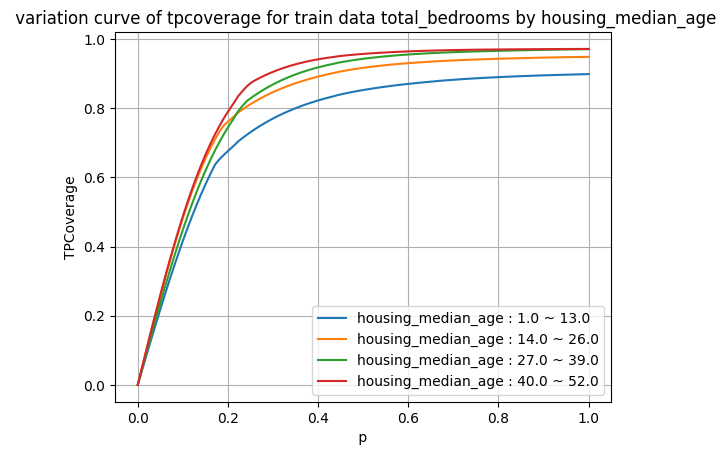

TPCoverage AUC of train data population by housing_median_age（1.0 ～ 13.0）:0.8072748465307731
TPCoverage AUC of train data population by housing_median_age（14.0 ～ 26.0）:0.8944791333155043
TPCoverage AUC of train data population by housing_median_age（27.0 ～ 39.0）:0.8529938242721317
TPCoverage AUC of train data population by housing_median_age（40.0 ～ 52.0）:0.8509568202114681


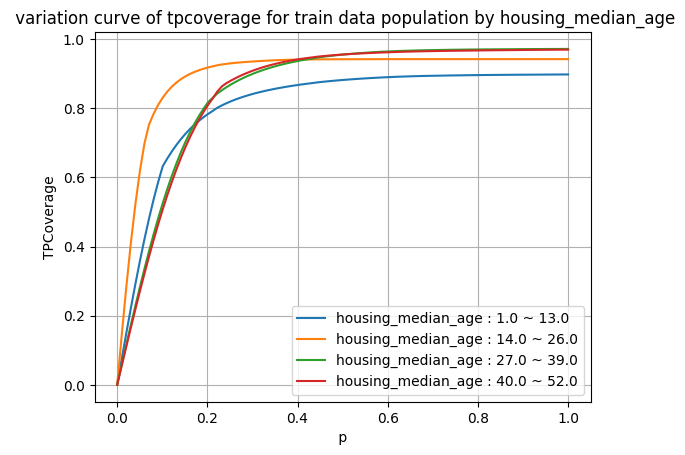

TPCoverage AUC of train data households by housing_median_age（1.0 ～ 13.0）:0.7617605023978499
TPCoverage AUC of train data households by housing_median_age（14.0 ～ 26.0）:0.8246822796448928
TPCoverage AUC of train data households by housing_median_age（27.0 ～ 39.0）:0.8318783264029954
TPCoverage AUC of train data households by housing_median_age（40.0 ～ 52.0）:0.8495319015698336


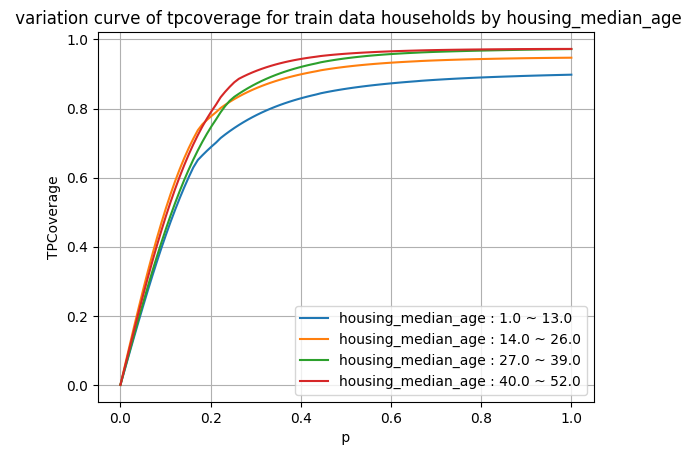

TPCoverage AUC of train data median_income by housing_median_age（1.0 ～ 13.0）:0.7671474507511338
TPCoverage AUC of train data median_income by housing_median_age（14.0 ～ 26.0）:0.7564111130150207
TPCoverage AUC of train data median_income by housing_median_age（27.0 ～ 39.0）:0.7835813406648728
TPCoverage AUC of train data median_income by housing_median_age（40.0 ～ 52.0）:0.7644525163686932


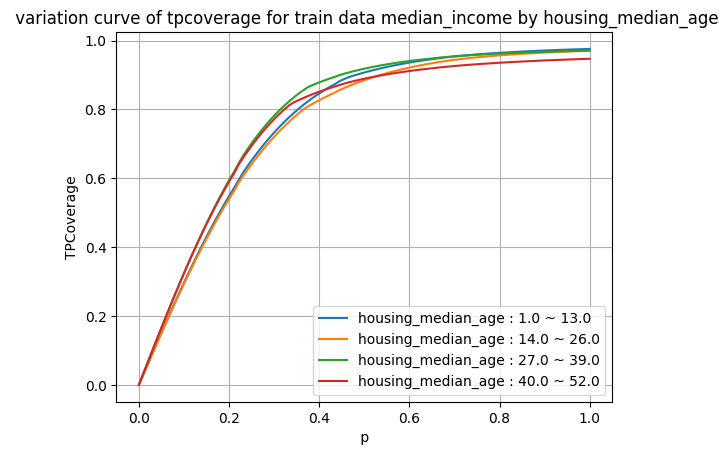

TPCoverage AUC of test data total_bedrooms by housing_median_age（1.0 ～ 13.0）:0.7259461251916726
TPCoverage AUC of test data total_bedrooms by housing_median_age（14.0 ～ 26.0）:0.8223898908535571
TPCoverage AUC of test data total_bedrooms by housing_median_age（27.0 ～ 39.0）:0.8375642276866566
TPCoverage AUC of test data total_bedrooms by housing_median_age（40.0 ～ 52.0）:0.8358035703630436


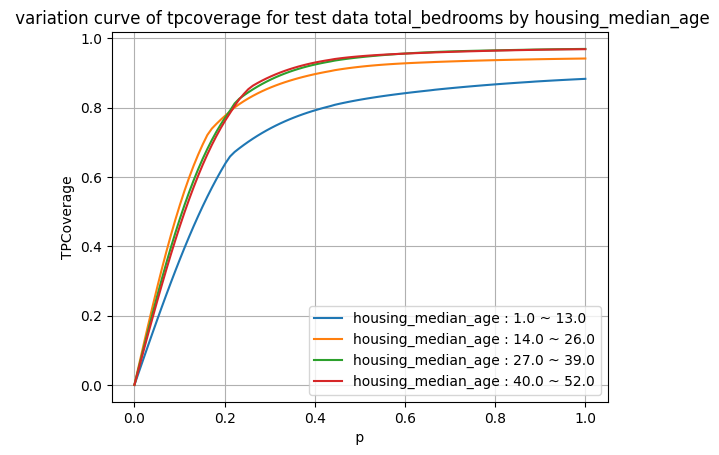

TPCoverage AUC of test data population by housing_median_age（1.0 ～ 13.0）:0.7433120037883111
TPCoverage AUC of test data population by housing_median_age（14.0 ～ 26.0）:0.7432112412744578
TPCoverage AUC of test data population by housing_median_age（27.0 ～ 39.0）:0.8777705925719553
TPCoverage AUC of test data population by housing_median_age（40.0 ～ 52.0）:0.7548496592675815


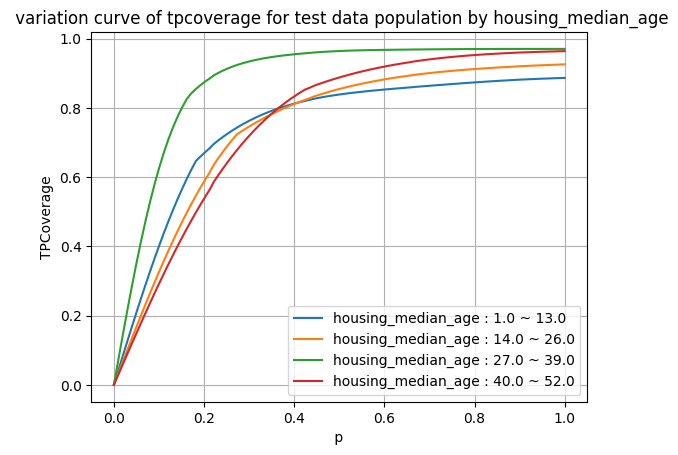

TPCoverage AUC of test data households by housing_median_age（1.0 ～ 13.0）:0.7378426297660479
TPCoverage AUC of test data households by housing_median_age（14.0 ～ 26.0）:0.8203289779732091
TPCoverage AUC of test data households by housing_median_age（27.0 ～ 39.0）:0.8345192663908049
TPCoverage AUC of test data households by housing_median_age（40.0 ～ 52.0）:0.8265672056996646


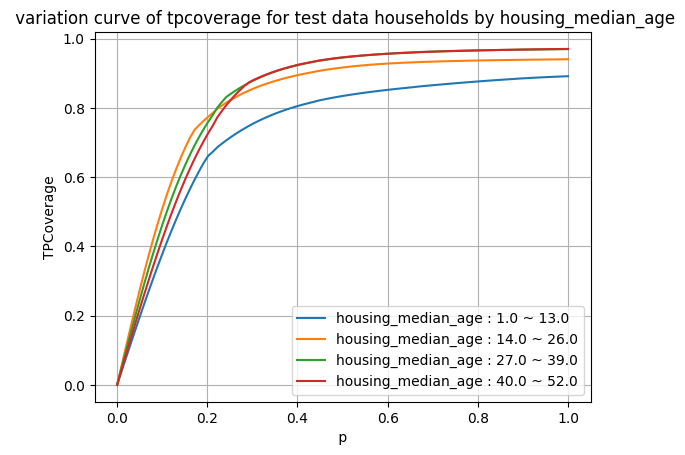

TPCoverage AUC of test data median_income by housing_median_age（1.0 ～ 13.0）:0.7184014096618322
TPCoverage AUC of test data median_income by housing_median_age（14.0 ～ 26.0）:0.7289813253964995
TPCoverage AUC of test data median_income by housing_median_age（27.0 ～ 39.0）:0.7801468805814084
TPCoverage AUC of test data median_income by housing_median_age（40.0 ～ 52.0）:0.7666440153323434


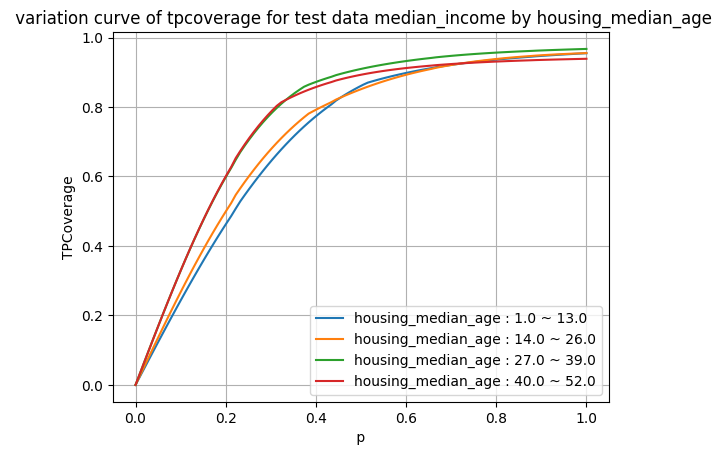

In [24]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [25]:
ait_owner='AIST'
ait_creation_year='2024'

### #12 Deployment

[uneditable] 

In [26]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
